# 2 inputs, 2 Neurons, 2 outputs
# Explicit network definition

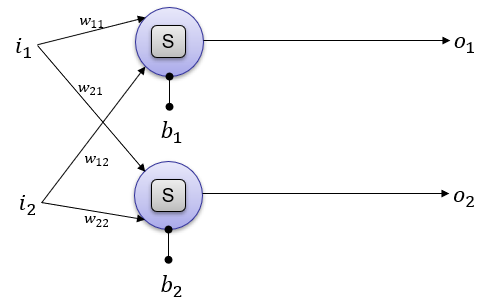

In [1]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i2_o2_sigmoid_01a.png", width=500)

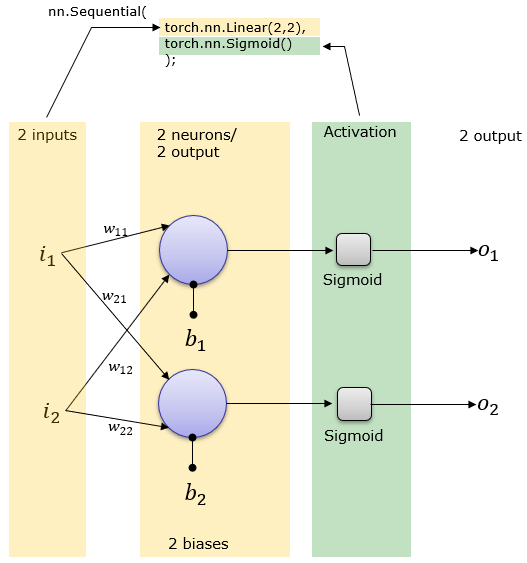

In [2]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i2_o2_sigmoid_01.png", width=500)

# Prerequisites

In [3]:
import torch
from torch import nn
from torch import optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from draw import display_solution

#predictive
torch.manual_seed(1);

device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')  
    
#sigmoid explicit
def sigmoid(x):
    return 1/(1+torch.exp(-x))

#sigmoid pre-defined
activation = torch.nn.Sigmoid()

# Loss (Binary Cross Entropy) error function, explicit def
def bce_err(output, target):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)

#sigmoid + BCELoss (Binary Cross Entropy)
criterion = torch.nn.BCEWithLogitsLoss()
        
def state(interval,i,loss,out,y):
    if(i%interval == 0):
        print("\n========== Epoch", i,"==========")
        print("loss=",loss)

        #.clone().detach()
        #to numpy
        out1 = out.data.numpy()
        y3 = y.numpy()
        #all values less than 0.5 to < 0
        out2 = out1-0.5
        # <0.5 turned to False, >= 0.5 turned to True
        out3 = (out2>=0)
        #boolean to decimal 0/1
        out4=out3*1   
        #boolean results
        rez = (out4 == y3)        
        #procent of True's(exact classification: y_hat=y, prediction = label/target)
        accuracy = np.min(np.mean(rez,axis=0))
        print("accuracy=",accuracy)        
        
#array data points: x1, x2
#data = np.array([
#    [1,10,1,1],
#    [3,10,0,1],
#    [1.8,2.0,0,0],
#    [-1,-1,1,0],
#    [-2,10,1,1],
#]) 

#   quadrants
#   0,1 | 0,0
#  --------------
#   1,1 | 1,0

#training points
data = np.array([
    [0.1,0.1,0,0],
    [0.2,0.5,0,0],
    [-0.2,0.4,0,1],
    [-0.8,0.2,0,1],
    [-0.5,-0.1,1,1],
    [-0.1,-0.24,1,1],
    [0.2,-0.2,1,0],
])          


#df = pd.read_csv('test.csv', header=None)
#df = pd.read_csv('data2.csv', header=None)
#data = df.to_numpy()        

### Class + Linear network definition

In [4]:
#        nn.Linear(input,neurons)    
linear = nn.Linear(2, 2)
linear.weight

Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319]], requires_grad=True)

In [19]:
torch.manual_seed(1);

#features
x = torch.from_numpy(data[:, [0,1]]).float()
#target/labels
y = torch.from_numpy(data[:, [2,3]]).float()

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2,2)
        self.activation = nn.Sigmoid()
        
    def forward(self,x):
        o = self.linear(x)
        o = self.activation(o)
        return o

net = Network()
print(net)   
print(net.forward(x))  

Network(
  (linear): Linear(in_features=2, out_features=2, bias=True)
  (activation): Sigmoid()
)
tensor([[0.3406, 0.6091],
        [0.3211, 0.6371],
        [0.2966, 0.6420],
        [0.2651, 0.6457],
        [0.3065, 0.6129],
        [0.3481, 0.5886],
        [0.3704, 0.5818]], grad_fn=<SigmoidBackward>)


In [6]:
#learn rate
alpha = 0.1
#iterations
epochs = 700
#display state
fv = 50

#Stochastic/Batch gradient descent
optimizer = optim.SGD(net.parameters(), lr=0.1) 

lossHistory = []
predictionHistory = []

#optional manually set weights: gives error, maybe a bug ?!
#net.linear.weight.data.fill_(1)
#net.linear.bias.data.fill_(1)
#net.linear.weight.data = torch.tensor([[1, -1]])
#net.linear.bias.data = torch.tensor([1])

w = net.linear.weight.data[0].numpy()
b = net.linear.bias.data.numpy()[0]
predictionHistory.append([w[0],w[1],b])

for i in range(epochs):
    #forward
    out = net.forward(x)
    
    #error function
    loss = torch.mean(bce_err(out,y))
    #loss = torch.mean(nn.BCELoss(out,y))
    #loss = criterion(out, y)
    
    lossHistory.append(loss)
    
    optimizer.zero_grad()
    
    #process gradients
    loss.backward()
    
    #update weights
    optimizer.step()
   
    w = net.linear.weight.data[0].numpy()
    b = net.linear.bias.data.numpy()[0]
    predictionHistory.append([w[0],w[1],b])
    
    state(fv,i,loss,out,y)
        
print("")
#weights = net.linear.weight[0].data.numpy()
#bias = net.linear.bias[0].data.numpy()
print("Final result:", w[0],w[1], b)


========== Epoch 0 ==========
loss= tensor(0.7346, grad_fn=<MeanBackward0>)
accuracy= 0.14285714285714285

========== Epoch 50 ==========
loss= tensor(0.6718, grad_fn=<MeanBackward0>)
accuracy= 0.42857142857142855

========== Epoch 100 ==========
loss= tensor(0.6297, grad_fn=<MeanBackward0>)
accuracy= 0.5714285714285714

========== Epoch 150 ==========
loss= tensor(0.5958, grad_fn=<MeanBackward0>)
accuracy= 0.5714285714285714

========== Epoch 200 ==========
loss= tensor(0.5666, grad_fn=<MeanBackward0>)
accuracy= 0.5714285714285714

========== Epoch 250 ==========
loss= tensor(0.5405, grad_fn=<MeanBackward0>)
accuracy= 0.8571428571428571

========== Epoch 300 ==========
loss= tensor(0.5172, grad_fn=<MeanBackward0>)
accuracy= 0.8571428571428571

========== Epoch 350 ==========
loss= tensor(0.4960, grad_fn=<MeanBackward0>)
accuracy= 0.8571428571428571

========== Epoch 400 ==========
loss= tensor(0.4769, grad_fn=<MeanBackward0>)
accuracy= 0.8571428571428571

========== Epoch 450 =======

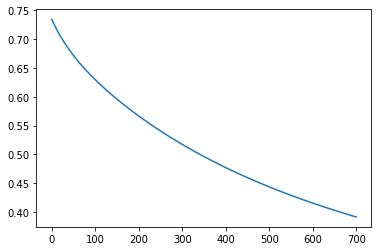

In [7]:
#loss evolution
graph_x = np.arange(0, epochs)
graph_y = lossHistory
plt.plot(graph_x, graph_y)
plt.show()

In [8]:
w = net.linear.weight.data.numpy()
b = net.linear.bias.data.numpy()
print(w)
print(b)

[[ 0.17156306 -2.9242384 ]
 [-3.1507332  -0.4682369 ]]
[-0.05765162 -0.00965191]


In [9]:
#new testing data
test_data = np.array([
    [0.11,0.45,0,0],
    [-0.0,0.25,0,1],
    [-0.5,-0.6,1,1],
    [0.91,-0.3,1,0],
])
x_test = torch.from_numpy(test_data[:, [0,1]]).float()
y_test = torch.from_numpy(test_data[:, [2,3]]).float()
#print(x_test)
test_out = net.forward(x_test)
print(test_out)

tensor([[0.2051, 0.3619],
        [0.3124, 0.4684],
        [0.8336, 0.8637],
        [0.7263, 0.0609]], grad_fn=<SigmoidBackward>)


In [10]:
def accuracy(out,y):

    #to numpy
    out1 = out.data.numpy()
    y3 = y.numpy()
    #all values less than 0.5 to < 0
    out2 = out1-0.5
    # <0.5 turned to False, >= 0.5 turned to True
    out3 = (out2>=0)
    #boolean to decimal 0/1
    out4=out3*1   
    #boolean results
    rez = (out4 == y3)     
    print(rez)
    #procent of True's(exact classification: y_hat=y, prediction = label/target)
    accuracy = np.min(np.mean(rez,axis=0))
    print("accuracy=",accuracy)

In [11]:
accuracy(test_out,y_test)

[[ True  True]
 [ True False]
 [ True  True]
 [ True  True]]
accuracy= 0.75
